<a href="https://colab.research.google.com/github/ric31303/Computer-Vision-II-Air-Drums/blob/dev/C3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer**-Vision-II-Air-Drums

github: https://github.com/ric31303/Computer-Vision-II-Air-Drums.git

# Set Env

In [1]:
!git clone https://github.com/ric31303/Computer-Vision-II-Air-Drums.git
%ls

Cloning into 'Computer-Vision-II-Air-Drums'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 116 (delta 54), reused 85 (delta 35), pack-reused 0
Receiving objects: 100% (116/116), 34.25 KiB | 4.89 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Computer-Vision-II-Air-Drums/  sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Computer-Vision-II-Air-Drums/  drive/  sample_data/


In [3]:
%run Computer-Vision-II-Air-Drums/C3D.py

Run CSD


# Run C3N model

In [0]:
# import pandas as pd
import os
import matplotlib.pyplot as plt

# url = 'sample_data/california_housing_test.csv'
# df1 = pd.read_csv(url)
# print(df1)
path = 'drive/My Drive/ML_DATA/input/'
# entries = os.listdir(path)
# print(entries)
c3d = C3D(path) 
c3d.epoch_num = 30
c3d.class_weight = {0: 1.,
        1: 50.,
        2: 50.,
        3: 50.
        }

# Construct C3D model

In [0]:
print("[C3D][train] start")

# callbacks: early_stop, check_point
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.01, patience=2, mode = "min")
cp_callback = keras.callbacks.ModelCheckpoint(filepath=CP_PATH,save_weights_only=True,verbose=1)
callback_list = [es_callback,cp_callback]

model = keras.Sequential(
    [
        Conv3D(64,c3d.conv_kernel_shape, activation='relu', input_shape=c3d.input_data_shape),
        MaxPooling3D(pool_size=c3d.pool_kernel_shape1, strides=None, padding="valid", data_format=None),
        Conv3D(128,c3d.conv_kernel_shape, activation='relu'),
        MaxPooling3D(pool_size=c3d.pool_kernel_shape1, strides=None, padding="valid", data_format=None),
        Flatten(),
        Dense(64, activation="relu", name="fc_layer1"),
        Dense(64, activation="relu", name="fc_layer2"),
        Dense(c3d.output_size, activation="softmax", name="fc_layer3")
    ]
)
model.compile('adam', loss='categorical_crossentropy',metrics=["accuracy"])

print(model.summary())
# get data 
(trainX, testX, trainY, testY) = c3d.getData()
# model.save_weights(checkpoint_path.format(epoch=0))


print("\n[C3D][train] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=c3d.batch_size, epochs=c3d.epoch_num,class_weight=c3d.class_weight,
    callbacks = callback_list, verbose=1)
# model.load_weights(checkpoint_path)
model.save(MODEL_PATH)

predictions = model.predict(testX, batch_size=c3d.batch_size)
print("\n[C3D][train] evaluating network...")
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=c3d.targets))
print("[C3D][train] end")

# c3d_model.plotResult(H)




13


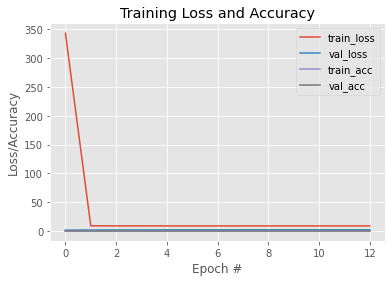

In [10]:

# load model and print predictions
model = keras.models.load_model(MODEL_PATH)
predictions = model.predict(testX, batch_size=c3d.batch_size)

loss = H.history["loss"]
val_loss = H.history["val_loss"]
accuracy = H.history["accuracy"]
val_accuracy = H.history["val_accuracy"]
print(len(loss))

training_number = len(loss)
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, training_number), loss, label="train_loss")
plt.plot(np.arange(0, training_number), val_loss, label="val_loss")
plt.plot(np.arange(0, training_number), accuracy, label="train_acc")
plt.plot(np.arange(0, training_number), val_accuracy, label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()